In [1]:
import pandas as pd
import numpy as np
import datetime as dt
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set(style="white", rc={"figure.figsize":(8, 4)})
plt.style.use('ggplot') # fivethirtyeight, ggplot, dark_background, classic,  


from statistics import mean
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import coint
import math 

import warnings
warnings.filterwarnings("ignore")

### 1. Fetch hist price data

In [2]:
stocks_hist_price_df = pd.read_csv('../data/stocks_hist_price.csv', date_parser=['date'])
stocks_hist_price_df.date = pd.to_datetime(stocks_hist_price_df.date, format='ISO8601')

# fetch full historical adj close price
full_hist_close_df = stocks_hist_price_df.pivot_table(values='Adj Close', index='date', columns='ticker')
full_hist_close_df.index = full_hist_close_df.index.date
full_hist_close_df.interpolate(method='linear', axis=1, inplace=True)
full_hist_close_df.head()

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,AON,AOS,APA,APD,APH,APTV,ARE,ATO,ATVI,AVB,AVGO,AVY,AWK,AXP,AZO,BA,BAC,BALL,BAX,BBWI,BBY,BDX,BEN,BF-B,BG,BIIB,BIO,BK,BKNG,BKR,BLK,BMY,BR,BRK-B,BRO,BSX,BWA,BXP,C,CAG,CAH,CARR,CAT,CB,CBOE,CBRE,CCI,CCL,CDAY,CDNS,CDW,CE,CEG,CF,CFG,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMA,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COO,COP,COST,CPB,CPRT,CPT,CRL,CRM,CSCO,CSGP,CSX,CTAS,CTLT,CTRA,CTSH,CTVA,CVS,CVX,CZR,D,DAL,DD,DE,DFS,DG,DGX,DHI,DHR,DIS,DISH,DLR,DLTR,DOV,DOW,DPZ,DRI,DTE,DUK,DVA,DVN,DXC,DXCM,EA,EBAY,ECL,ED,EFX,EIX,EL,ELV,EMN,EMR,ENPH,EOG,EPAM,EQIX,EQR,EQT,ES,ESS,ETN,ETR,ETSY,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FCX,FDS,FDX,FE,FFIV,FICO,FIS,FISV,FITB,FLT,FMC,FOX,FOXA,FRC,FRT,FSLR,FTNT,FTV,GD,GE,GEHC,GEN,GILD,GIS,GL,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,GRMN,GS,GWW,HAL,HAS,HBAN,HCA,HD,HES,HIG,HII,HLT,HOLX,HON,HPE,HPQ,HRL,HSIC,HST,HSY,HUM,HWM,IBM,ICE,IDXX,IEX,IFF,ILMN,INCY,INTC,INTU,INVH,IP,IPG,IQV,IR,IRM,ISRG,IT,ITW,IVZ,J,JBHT,JCI,JKHY,JNJ,JNPR,JPM,K,KDP,KEY,KEYS,KHC,KIM,KLAC,KMB,KMI,KMX,KO,KR,L,LDOS,LEN,LH,LHX,LIN,LKQ,LLY,LMT,LNC,LNT,LOW,LRCX,LUV,LVS,LW,LYB,LYV,MA,MAA,MAR,MAS,MCD,MCHP,MCK,MCO,MDLZ,MDT,MET,META,MGM,MHK,MKC,MKTX,MLM,MMC,MMM,MNST,MO,MOH,MOS,MPC,MPWR,MRK,MRNA,MRO,MS,MSCI,MSFT,MSI,MTB,MTCH,MTD,MU,NCLH,NDAQ,NDSN,NEE,NEM,NFLX,NI,NKE,NOC,NOW,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWL,NWS,NWSA,NXPI,O,ODFL,OGN,OKE,OMC,ON,ORCL,ORLY,OTIS,OXY,PARA,PAYC,PAYX,PCAR,PCG,PEAK,PEG,PEP,PFE,PFG,PG,PGR,PH,PHM,PKG,PKI,PLD,PM,PNC,PNR,PNW,PODD,POOL,PPG,PPL,PRU,PSA,PSX,PTC,PWR,PXD,PYPL,QCOM,QRVO,RCL,RE,REG,REGN,RF,RHI,RJF,RL,RMD,ROK,ROL,ROP,ROST,RSG,RTX,SBAC,SBUX,SCHW,SEDG,SEE,SHW,SJM,SLB,SNA,SNPS,SO,SPG,SPGI,SRE,STE,STLD,STT,STX,STZ,SWK,SWKS,SYF,SYK,SYY,T,TAP,TDG,TDY,TECH,TEL,TER,TFC,TFX,TGT,TJX,TMO,TMUS,TPR,TRGP,TRMB,TROW,TRV,TSCO,TSLA,TSN,TT,TTWO,TXN,TXT,TYL,UAL,UDR,UHS,ULTA,UNH,UNP,UPS,URI,USB,V,VFC,VICI,VLO,VMC,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WBD,WDC,WEC,WELL,WFC,WHR,WM,WMB,WMT,WRB,WRK,WST,WTW,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2010-01-04,20.457943,4.496162,37.147512,6.496297,14.168113,21.839928,19.471235,7.994436,32.875025,37.09,22.997974,22.409246,27.363355,25.67,16.766800,20.912558,10.024065,17.154249,20.235688,23.103710,15.358914,25.92,31.517963,18.50,7.842692,22.636278,16.972134,11.307991,10.503995,9.70,15.740881,42.912508,29.673734,35.160463,6.6950,25.66750,44.64,32.784855,6.147614,86.618664,59.712849,10.264374,26.520551,42.776729,19.981378,10.019500,53.049670,13.992153,27.311765,16.701765,33.579803,158.03,43.712259,13.086236,11.668706,25.019825,7.497274,27.064023,61.341946,23.011332,10.800925,47.214855,53.64,97.87,21.234672,223.96,195.963057,167.966113,16.695592,17.081904,66.220,7.713207,9.01,14.683823,42.933663,27.825769,11.912359,22.675749,31.923500,41.171252,32.283174,23.051587,13.82,28.536110,23.891690,15.005845,6.12,16.484377,26.848754,20.298423,13.748092,13.157261,12.566431,44.269090,39.532329,34.795569,16.727843,30.313062,41.974803,21.786500,6.532045,40.555159,87.84,34.259811,10.119533,5.4250,8.614518,32.143401,37.511240,24.977002,43.857640,22.698190,4.55125,25.028694,33.57,18.7050,17.274800,4.225,4.290561,21.672964,15.436500,9.200037,21.694960,23.384426,25.073893,46.843021,34.879982,22.916943,9.968644,48.512039,42.954680,11.571938,21.251224,48.166555,9.600871,27.202972,27.936839,19.043274,29.164191,16.056675,21.874222,14.535149,7.196076,20.479561,22.937698,28.225121,29.960,53.533087,27.836543,2.1400,17.902883,9.559508,38.792110,26.727375,26.887459,21.994975,20.063036,49.839040,21.906181,29.539683,34.346771,39.153859,62.729369,86.304880,18.612921,21.947073,16.769059,54.847393,21.903058,46.345909,33.326995,20.308081,7.289167,20.543055,29.656223,21.789256,7.717892,6.608663,7.055024,7.501385,31.733881,57.511924,73.259340,24.976008,53.98,21.372207,19.575538,12.3575,7.010938,12.635013,18.259089,24.460573,30.662056,36.863540,43.065024,135.46,1.800,26.227923,50.655845,68.449171,37.793

---

### 2. Cluster data

In [3]:
cluster_df = pd.read_csv('../data/db_clabel_10y_data.csv')
target_cluster_df = cluster_df[cluster_df.cluster!=-1].reset_index(drop=True)
target_cluster_df.head()

,ticker,company_name,sector,cluster,bus_desc,Quick ratio,Cash ratio,Interest coverage,Debt equity ratio,Asset turnover,Receivables turnover,Return on assets,Operating profit margin,Enterprise value multiple,Payout ratio
0,ABBV,AbbVie,Health Care,3,AbbVie is an American publicly traded biopharm...,1.4990,0.97925,15.32825,5.750625,0.524125,5.102375,0.10575,0.301125,15.975625,0.74325
1,ABC,AmerisourceBergen,Health Care,2,AmerisourceBergen Corporation is an American d...,0.4915,0.11150,0.00000,12.862101,4.874700,17.167100,0.02870,0.009700,13.700800,0.15160
2,ADM,ADM,Consumer Staples,2,"The Archer-Daniels-Midland Company, commonly k...",0.5166,0.09360,0.00000,1.229600,1.772900,15.331700,0.04130,0.029300,8.803700,0.37790
3,ADSK,Autodesk,Information Technology,0,"Autodesk, Inc. is an American multinational so...",1.6525,1.02190,0.00000,-2.708600,0.554900,5.185900,-0.00240,0.013900,47.191400,0.00000
4,AES,AES Corporation,Utilities,4,The AES Corporation is a Fortune 500 company t...,0.6614,0.22450,2.04690,8.309500,0.379200,6.661600,-0.00100,0.196400,10.367000,0.30510


---

### 3. Find coint pairs

In [4]:
"Pair selection method"
"select a pair with lowest p-value from each cluster"
def cluster_pair_selection(cluster_df: pd.DataFrame, significance=0.05, 
                    start_day=dt.datetime(2010, 1, 1).date(), end_day=dt.datetime(2019, 12, 31).date()):
    final_stock_pairs = []   
    cluster_labels = cluster_df.cluster.value_counts().index.to_list()
    temp_price_df = full_hist_close_df.loc[start_day: end_day]

    for i in range(len(cluster_labels)):
        # loop over clusters to get best coint pair in each cluster
        tickers = target_cluster_df[target_cluster_df.cluster == cluster_labels[i]]['ticker'].values
        p_values = []
        coint_pairs = []
        for m in range(len(tickers)):
            for n in range(m+1,len(tickers)):
                p_val = coint(temp_price_df[tickers[m]], temp_price_df[tickers[n]])[1]
                p_values.append(p_val)
                coint_pairs.append([tickers[m], tickers[n]]) 
    
        if len(coint_pairs) > 0:
            if np.min(p_values) < significance:
                index = np.where(p_values == np.min(p_values))[0][0]
                final_stock_pairs.append(coint_pairs[index])
    
    return final_stock_pairs


hist_final_stock_pairs = cluster_pair_selection(cluster_df=target_cluster_df)
print(f"Number of clusters: {len(target_cluster_df.cluster.value_counts())}")
print(f"Number of cointegrated pairs: {len(hist_final_stock_pairs)}")
print(f"Pairs with lowest p-value from each clusters:\n{hist_final_stock_pairs}")

Number of clusters: 11
Number of cointegrated pairs: 9
Pairs with lowest p-value from each clusters:
[['ADSK', 'IDXX'], ['CE', 'ICE'], ['PSA', 'REG'], ['KO', 'LNT'], ['HON', 'WAT'], ['ADM', 'WAB'], ['FMC', 'J'], ['AVB', 'ESS'], ['RF', 'ZION']]


---

### 4. Construct a portfolio of pairs of stocks & backtest for CY20

In [5]:
class Pair:
    P_VALUE_THRESHOLD = 0.05 # significance level
    MIN_MEAN_CROSSES = 12 # minimum number of mean crosses in the signal
    TRADING_BOUND = 1 # STD level which signifies the trading bounds
    EXIT_PROFIT = 0 # level at which to exit and book profits (close the position)
    STOP_LOSS = 2 # STD level which signifies the stoploss bounds
    RETURN_ON_BOTH_LEGS = False # method of computing returns (should both long & short legs be considered)
    WAITING_DAYS = 15 # wait time period for a signal hold its state after crossing a level before which to close the trade 
    TRADING_START_DATE = dt.datetime(2020, 1, 1).date() # backtest period
    TRADING_END_DATE = dt.datetime(2021, 1, 1).date()
    TC = 1 # transaction costs (defined as a percentage of capital invested)
    
    def __init__(self, 
                stockX, 
                stockY, 
                trading_start_date = TRADING_START_DATE,
                trading_end_date = TRADING_END_DATE,
                waiting_days = WAITING_DAYS, 
                trading_bound = TRADING_BOUND, 
                exit_profit = EXIT_PROFIT, 
                stop_loss = STOP_LOSS,
                return_on_both_legs = RETURN_ON_BOTH_LEGS,
                tc = TC):
        # constructor
        self.name = f"{stockX.name}, {stockY.name}"
        self.stockX_trading = stockX[trading_start_date : trading_end_date]
        self.stockY_trading = stockY[trading_start_date : trading_end_date]
        self.waiting_days = waiting_days
        self.trading_start_date = trading_start_date
        self.trading_end_date = trading_end_date
        self.exit_profit = exit_profit
        self.trading_bound = trading_bound
        self.stop_loss = stop_loss
        self.return_on_both_legs = return_on_both_legs
        self.tc = tc
        self.error = False

        try:
            beta = OLS(stockY[trading_start_date : trading_end_date], stockX[trading_start_date : trading_end_date]).fit().params[0]
            self.spread = stockY[trading_start_date : trading_end_date] - beta * stockX[trading_start_date : trading_end_date]
            self.normalized_spread_trading = (self.spread - self.spread.mean()) / self.spread.std()
            self.p_value = coint(stockX, stockY)[1] 
            self.generate_trading_signals()
        except Exception as e:
            print(e)
            print(f"Error encountered with pair [{self.stockX_trading.name}, {self.stockY_trading.name}]")
            self.error = True
            
    def eligible(self, p_value_threshold = P_VALUE_THRESHOLD, min_mean_crosses = MIN_MEAN_CROSSES):
        # Check for the pair eligibility (if its p_val < threshold & if it meets the min mean crosses threshold)
        if self.error:
            return False
        elif self.p_value <= p_value_threshold and self.mean_crosses >= min_mean_crosses:
            return True
        return False
    
    def __level_crosses(self, series, level = 2):
        # Identify & record the changes in the signal movements as and when it crosses
        # either above or below a defined level 
        change = []
        for i, el in enumerate(series):
            if i != 0 and el > level and series[i-1] < level:
                # if signal crosses above the level (going upwards), record it as '1'
                change.append(1)
            elif i != 0 and el < level and series[i-1] > level:
                # if signal crosses below the level (going downwards), record it as '-1'
                change.append(-1)
            else:
                # else, record it as no change, '0'
                change.append(0)
        return change
    
    def __average_holding_period(self):
        # compute the average holding period for the pair,
        # based on their opening and closing positions recorded
        holding_periods = []
        for closed_date in self.closed_positions:
            open_date = list(filter(lambda x: x < closed_date, self.open_positions))[-1]
            holding_periods.append(closed_date - open_date)
        return np.mean(np.array(holding_periods))
    
    def __calculate_returns(self, pos_y, pos_x, i):
        # function to compute the total returns for the pair
        
        # first, calculate PnL for the pair either when a stoploss is recorded, 
        # or when the position is closed with profit booking
        if pos_x[2] == 'l':
            # long on X (meaning short Y - short the spread)
            cost_long = pos_x[0] * pos_x[1] # cost of long = opening price * number of stocks bought
            cost_short = pos_y[0] * pos_y[1] # cost of short => opening price * number of stocks (this is a simplified consideration) 
            profit = (self.stockX_trading[i] - self.pos_x[0]) * pos_x[1] + (self.pos_y[0] - self.stockY_trading[i]) * pos_y[1]
        else:
            # long on Y (meaning long spread - short X)
            cost_long = pos_y[0] * pos_y[1]
            cost_short = pos_x[0] * pos_x[1]
            profit = (self.pos_x[0] - self.stockX_trading[i]) * pos_x[1] + (self.stockY_trading[i] - self.pos_y[0]) * pos_y[1]
        
        # second, compute returns considering the transaction costs as well
        if self.return_on_both_legs:
            # (computes the unlevered rets)
            # computing total rets considering both the legs of the trade (long & short) to compute initiation costs
            return_before_tc = (profit / (cost_long + cost_short)) * 100
            return return_before_tc * (1.0 - (self.tc / 100))
        else:
            # calculate the return only on the cost of long position (computes the levered rets)
            return_before_tc = (profit / cost_long) * 100
            return return_before_tc * (1.0 - (self.tc / 100))
    
    def generate_trading_signals(self):
        # generate the trading signals for the pair (basically computes the 1, -1 & 0 values for the trade signal based on level crossing)
        self.upper_trading = self.__level_crosses(self.normalized_spread_trading, level = self.trading_bound)
        self.lower_trading = self.__level_crosses(self.normalized_spread_trading, level = -self.trading_bound)
        self.upper_stop = self.__level_crosses(self.normalized_spread_trading, level = self.stop_loss)
        self.lower_stop = self.__level_crosses(self.normalized_spread_trading, level = -self.stop_loss)
        self.mean = self.__level_crosses(self.normalized_spread_trading, level = self.exit_profit)
        
        # record the count of mean crosses
        self.mean_crosses = self.mean.count(1) + self.mean.count(-1) 
    
        open_position = False # flag to check for position status
        # entry_level = 0 # pos opening entry level
        
        # placeholders
        self.stop_losses = []
        self.open_positions = []
        self.closed_positions = []
        returns = []
        
        i = 0
        while i < len(self.normalized_spread_trading):
            # loop over every data point in the normalised spread signal (each date until the end)
            if open_position:
                # if in an open position, 
                # 1. if signal crosses above upper stoploss or crosses below lower stoploss bounds - book Loss & record rets, update stoplosses & wait for reversal
                # 2. if signal crosses at the mean bounds - close pos & book Profit & record rets
                # 3. else - nothing, so record no change with '0' rets
                if self.upper_stop[i] == 1 or self.lower_stop[i] == -1:
                    # STOP LOSS (CLOSE WITH LOSS & WAIT FOR REVERSAL)
                    open_position = False
                    returns.append(self.__calculate_returns(pos_y= self.pos_y, pos_x=self.pos_x, i=i))
                    self.stop_losses.append(i)
                    i += self.waiting_days # wait for signal to reverse its course and get back within the bounds
                    returns.extend([0] * (self.waiting_days - 1))
                    continue
                elif self.mean[i] != 0:
                    # CLOSING WITH PROFIT
                    open_position = False
                    returns.append(self.__calculate_returns(pos_y= self.pos_y, pos_x=self.pos_x, i=i))
                    self.closed_positions.append(i)
                else:
                    returns.append(0)
            else:
                # if not in an open position,
                # enter into a pos if signal crosses below upper trading bound - short the spread
                # if signal above lower trading bound - go long the spread
                # else, no change, 
                # record returns as '0' (since in any case we are just opening a fresh positiion & not closing to be able to compute rets)
                if self.upper_trading[i] == -1 or self.lower_trading[i] == 1:
                    #ENTERING THE POSITION
                    open_position = True
                    self.open_positions.append(i)
                    #the return will not depend on the amount we fixed here
                    approx_amount = 100000
                    open_price_x = self.stockX_trading[i]
                    open_price_y = self.stockY_trading[i]
                    b = open_price_y / open_price_x
                    a = approx_amount / (open_price_y + b * open_price_x)
                    # we assume that you cannot buy portion of stocks, and the fixed amount is approximated (<1% error assumption!)
                    number_stocks_y = math.ceil(a)
                    number_stocks_x = math.ceil(a*b)
                    total_eff_amount = number_stocks_y * open_price_y + number_stocks_x * open_price_x
                    # placeholders for recording trade details (price & shares) when a position was opened; 'l' for long and 's' for short
                    if self.upper_trading[i] == -1:
                        #LONG X, SHORT Y
                        self.pos_x = (open_price_x, number_stocks_x, 'l')
                        self.pos_y = (open_price_y, number_stocks_y, 's')
                    elif self.lower_trading[i] == 1:
                        #SHORT X, LONG Y
                        self.pos_x = (open_price_x, number_stocks_x, 's')
                        self.pos_y = (open_price_y, number_stocks_y, 'l')
                    # record the spread level for entering into position 
                    # entry_level = self.spread[i]
                # here in this step, we just opened a fresh pos, so record rets as '0'
                returns.append(0)
            # step up to the next date
            i += 1
            
        self.profitable_trades_perc = len(self.closed_positions) / (len(self.closed_positions) + len(self.stop_losses)) * 100
        self.average_holding_period = self.__average_holding_period()
        
        self.returns_series = pd.Series(index = self.stockX_trading.index, data = returns)
        self.cum_returns = self.returns_series.cumsum()
        
    def plot_pair(self):
        # method to plot the price movement charts for the pair
        fig, (ax_stockX, ax_spread) = plt.subplots(2, 1)
        fig.suptitle(t=f'Price movement and trading signal charts for the pair {self.stockX_trading.name, self.stockY_trading.name}', 
                     fontsize=16, fontweight='bold')
        
        ax_stockX.title.set_text("Stocks prices")
        ax_spread.title.set_text("Normalized spread")
        
        plt_X = ax_stockX.plot(self.stockX_trading, color = "b", label = self.stockX_trading.name)
        ax_stockY = ax_stockX.twinx()
        plt_Y = ax_stockY.plot(self.stockY_trading, color = "y", label = self.stockY_trading.name)
        # Solution for having two legends
        leg = plt_X + plt_Y
        labs = [l.get_label() for l in leg]
        ax_stockX.legend(leg, labs, loc=0)

        
        ax_spread.plot(self.normalized_spread_trading[self.trading_start_date : self.trading_end_date])
        ax_spread.axhline(self.trading_bound, linestyle = '--', color = "g", label = "Trading bound")
        ax_spread.axhline(-self.trading_bound, linestyle = '--', color = "g")
        ax_spread.axhline(self.stop_loss, linestyle = '--', color = "r", label = "Stop loss")
        ax_spread.axhline(-self.stop_loss, linestyle = '--', color = "r")
        ax_spread.plot_date([self.normalized_spread_trading.index[i] for i in self.open_positions], [self.normalized_spread_trading[i] for i in self.open_positions], label = 'Open position', marker = '^', markeredgecolor = 'b', markerfacecolor = 'b', markersize = 16)
        ax_spread.plot_date([self.normalized_spread_trading.index[i] for i in self.closed_positions], [self.normalized_spread_trading[i] for i in self.closed_positions], label = 'Closed position', marker = 'P', markeredgecolor = 'g', markerfacecolor = 'g', markersize = 16)
        ax_spread.plot_date([self.normalized_spread_trading.index[i] for i in self.stop_losses], [self.normalized_spread_trading[i] for i in self.stop_losses], label = 'Stop loss', marker = 'X', markeredgecolor = 'r', markerfacecolor = 'r', markersize = 16)
        ax_spread.legend(loc=0)

        fig.set_size_inches(16, 10, forward = True)
        fig.show()
        plt.tight_layout()
        
    def __repr__(self):
        s = f"Pair [{self.stockX_trading.name}, {self.stockY_trading.name}]"
        s += f"\n\tp-value: {self.p_value}"
        s += f"\n\tMean crosses: {self.mean_crosses}"
        s += f"\n\tPair eligible: {self.eligible()}"
        s += f"\n\tProfitable trades (%): {self.profitable_trades_perc}"
        s += f"\n\tAverage holding period (days): {self.average_holding_period}"
        return s

In [6]:
class Portfolio:
    def __init__(self, stocks_df: pd.DataFrame, pairs_list: list):
        if not isinstance(stocks_df, pd.core.frame.DataFrame):
            raise Exception("Symbols must be provided in a Pandas DataFrame")
        
        self.time_series_df = stocks_df
        # self.time_series_df.dropna(inplace = True)
        self.symbols_list = self.time_series_df.columns
        # self.all_possible_pairs = list(combinations(self.symbols_list, 2))
        self.defined_pairs = pairs_list
        self.selected_pairs = list()
        
        for i, pair_symbols in enumerate(self.defined_pairs):
            print(f"{i}/{len(self.defined_pairs)}")
            pair = Pair(self.time_series_df[pair_symbols[0]], 
                        self.time_series_df[pair_symbols[1]])
            if pair.eligible():
                self.selected_pairs.append(pair)
        
        self.calculate_portfolio_return()
                
    def calculate_portfolio_return(self):
        # compute portfolio return & cumm return  metrics
        data = dict()
        for pair in self.selected_pairs:
            data[pair.name] = pair.returns_series
        df_return = pd.DataFrame(data = data)
        df_return['Return'] = df_return.mean(axis = 1)
        self.returns = df_return['Return']
        df_return['Cumulative Return'] = df_return['Return'].cumsum()
        self.cum_return = df_return['Cumulative Return']
        self.sharpe_ratio = np.nanmean(self.returns)/np.nanstd(self.returns)
        
    def plot_portfolio(self):
        # plot portfolio
        plt.title(f"Return of a selective portfolio of ({len(self.selected_pairs)}) pairs of cointegrated stocks\n", 
                  fontweight='bold', fontsize=12)
        plt.plot(self.returns, label='Daily returns')
        plt.plot(self.cum_return, linestyle = '--', label='Cummulative returns')
        plt.ylabel("Percentage return (%)")
        plt.legend(loc='best')
        plt.figtext(0.65, 0.4, f'Sharpe ratio = {self.sharpe_ratio:.4f}', bbox=dict(facecolor='orange', alpha=0.3), fontsize=10)
        plt.show()
        
    def plot_pairs(self):
        # plot pairs price movements
        for pair in self.selected_pairs:
            pair.plot_pair()

0/9
1/9
2/9
3/9
Length of values (259) does not match length of index (253)
Error encountered with pair [KO, LNT]
4/9
5/9
6/9
7/9
8/9


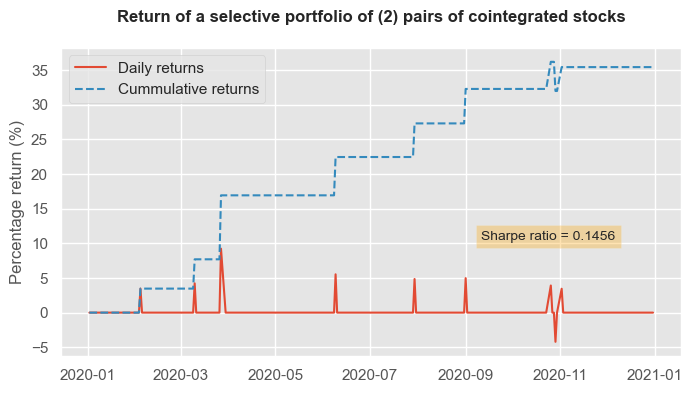

In [7]:
portfolio = Portfolio(stocks_df=full_hist_close_df, pairs_list=hist_final_stock_pairs)
portfolio.plot_portfolio()

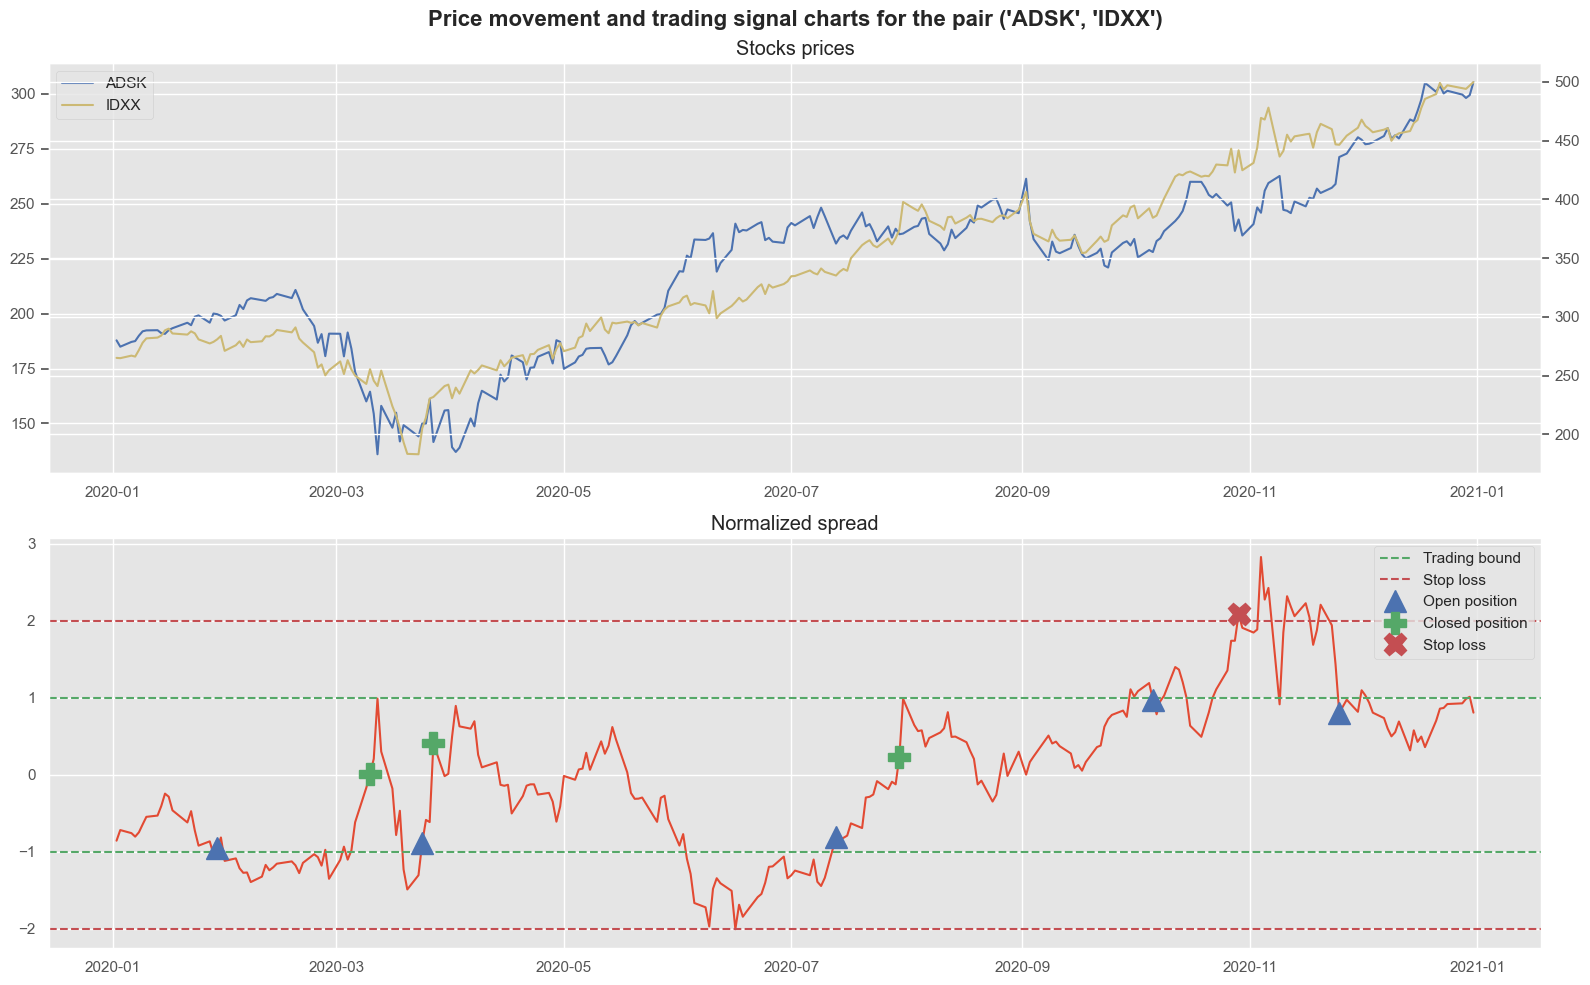

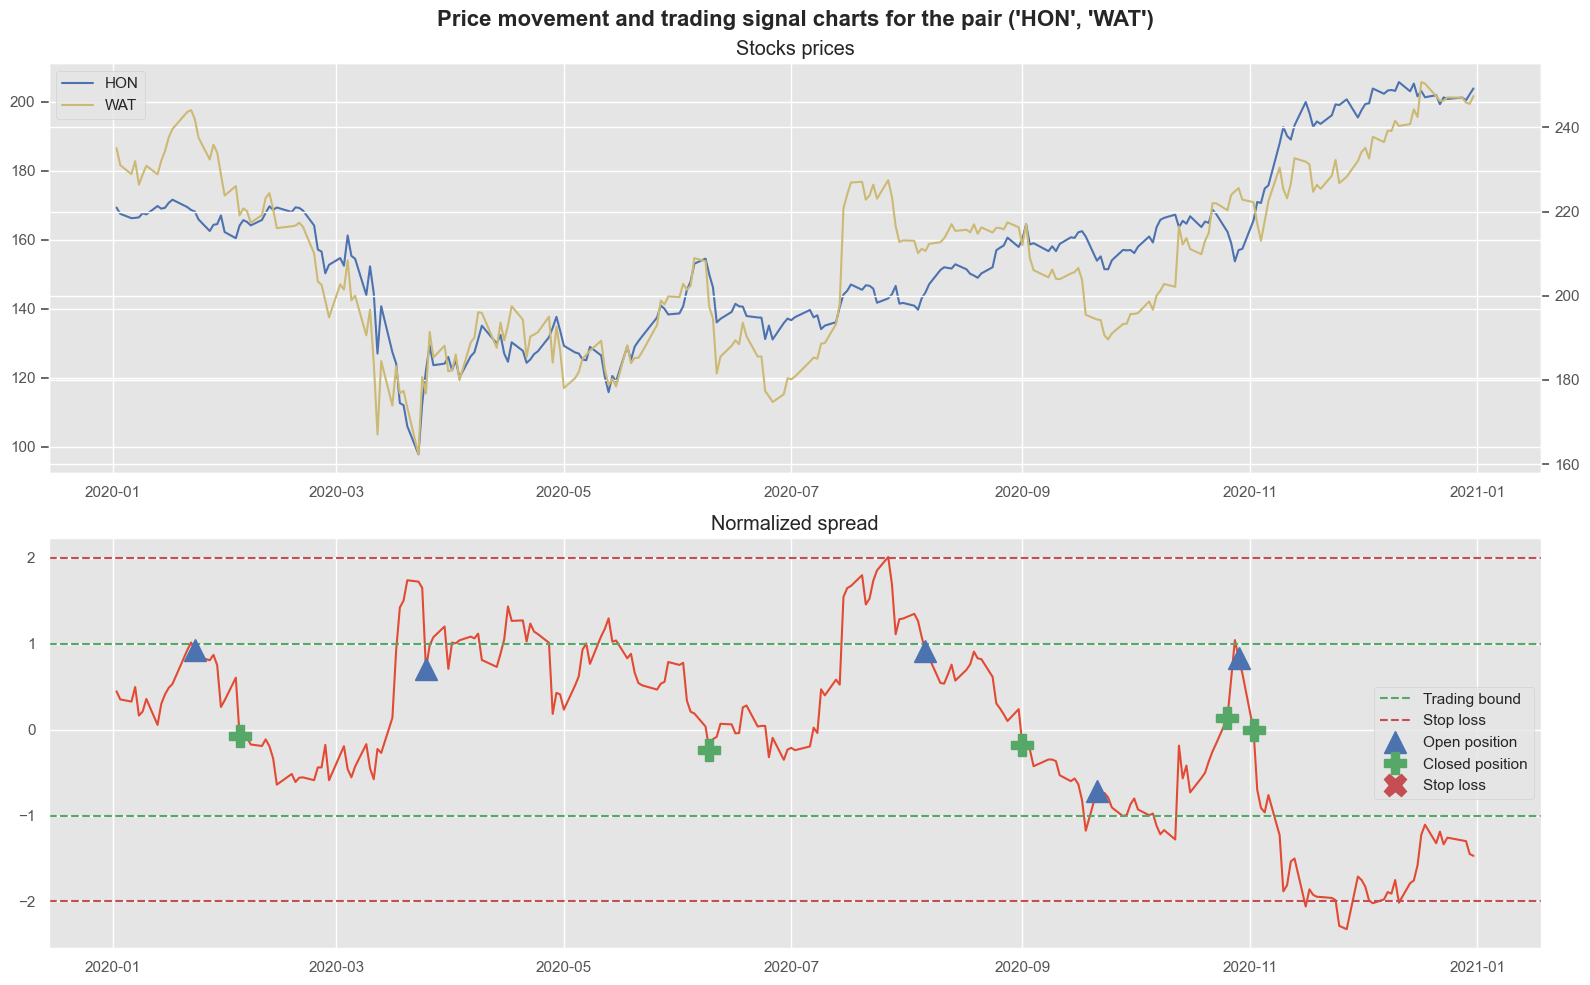

In [8]:
portfolio.plot_pairs()

In [9]:
portfolio.selected_pairs

[Pair [ADSK, IDXX]
 	p-value: 0.012447375804905474
 	Mean crosses: 13
 	Pair eligible: True
 	Profitable trades (%): 75.0
 	Average holding period (days): 14.666666666666666,
 Pair [HON, WAT]
 	p-value: 0.005025120327648573
 	Mean crosses: 13
 	Pair eligible: True
 	Profitable trades (%): 100.0
 	Average holding period (days): 21.0]

---

### 5. Plot benchmark return over the CY20 and compare/contrast portfolio perf

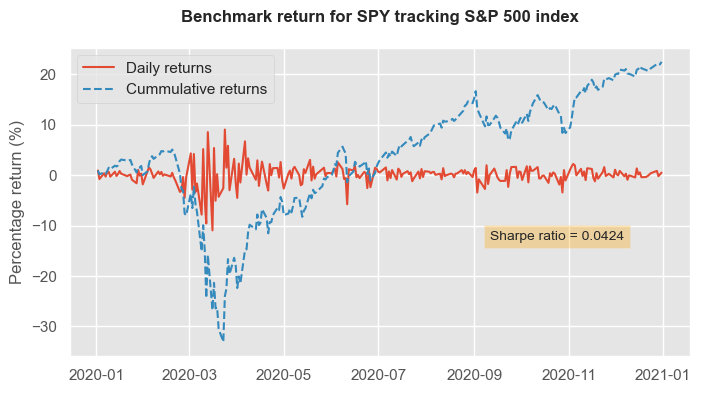

In [10]:
def plot_benchmark_ret():
    spy_index_df = pd.read_csv('../data/SPY_hist_price.csv', date_parser=['date'])
    spy_index_df.date = pd.to_datetime(spy_index_df.date, format='ISO8601')
    spy_index_df.date = spy_index_df.date.apply(lambda x: x.date())
    temp_df = spy_index_df[(spy_index_df.date > dt.datetime(2020, 1, 1).date()) & (spy_index_df.date < dt.datetime(2021, 1, 1).date())]
    temp_df['cum_ret'] = temp_df['simple_return'].cumsum()
    spy_sharpe = np.nanmean(temp_df['simple_return'])/np.nanstd(temp_df['simple_return'])

    # plot benchmark
    plt.title(f"Benchmark return for SPY tracking S&P 500 index\n", 
                fontweight='bold', fontsize=12)
    plt.plot(temp_df['date'], temp_df['simple_return'] * 100, label='Daily returns')
    plt.plot(temp_df['date'], temp_df['cum_ret'] * 100, linestyle = '--', label='Cummulative returns')
    plt.ylabel("Percentage return (%)")
    plt.figtext(0.65, 0.4, f'Sharpe ratio = {spy_sharpe:.4f}', bbox=dict(facecolor='orange', alpha=0.3), fontsize=10)
    plt.legend(loc='best')
    plt.show()

plot_benchmark_ret()

---